In [1]:
# Importing the libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Datase

df = pd.read_csv("StoreData.csv", encoding = "latin1")
df.to_csv("StoreData.csv", index = False, encoding= 'utf-8')

In [3]:
# Quick Look

print(df.info())
print(df.head())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [4]:
# Data cleaning

df = df.dropna() # removing the missing values
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [5]:
# Analysis
# Total sales and profit

total_sales = df["Sales"].sum()
total_profit = df["Profit"].sum()
print(f"Total Sales : {total_sales}")
print(f"Total profit : {total_profit}")

Total Sales : 2297200.8603000003
Total profit : 286397.0217


In [6]:
# Sales by Category

sales_by_category = df.groupby("Category")["Sales"].sum()
print(sales_by_category)

Category
Furniture          741999.7953
Office Supplies    719047.0320
Technology         836154.0330
Name: Sales, dtype: float64


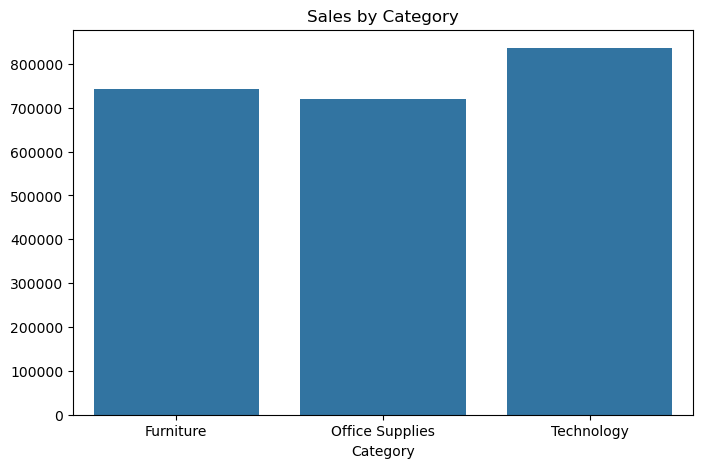

In [11]:
# Visualization

plt.figure(figsize=(8,5))
sns.barplot(x=sales_by_category.index, y= sales_by_category.values)
plt.title("Sales by Category")
plt.savefig("images/sales_by_category.png", dpi=300, bbox_inches="tight")
plt.show()

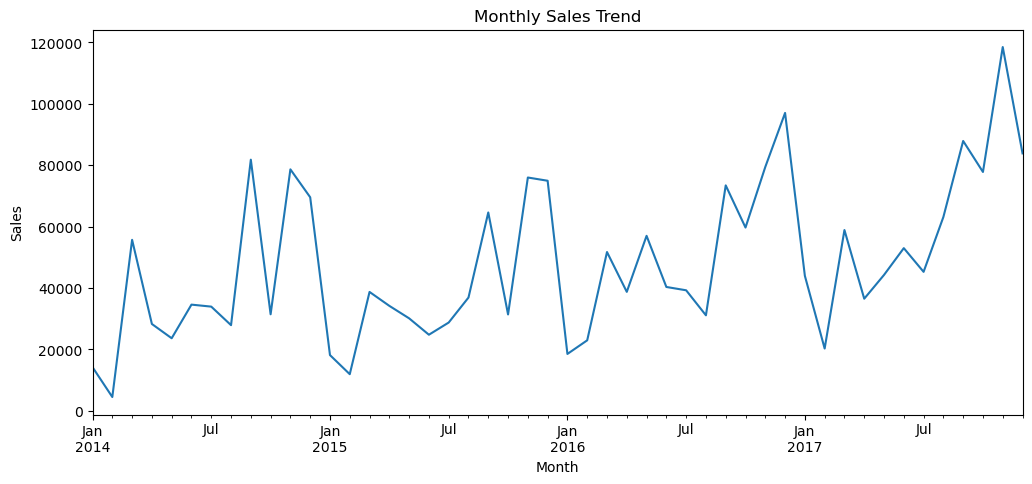

In [10]:
# Monthy Sales Trend

df["Month"] = df["Order Date"].dt.to_period("M")
monthly_sales = df.groupby("Month")["Sales"].sum()

plt.figure(figsize = (12,5))
monthly_sales.plot()
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.savefig("images/monthly_sales_trend.png", dpi=300, bbox_inches="tight")
plt.show()

In [9]:
print(df.head())

   Row ID        Order ID Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ... Region  \
0      Claire Gute   Consumer  United States        Henderson  ...  South   
1      Claire Gute   Consumer  United States        Henderson  ...  South   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   West   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...  South   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...  South   

        Product ID         Category Sub-Category  \
0  F